In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.80564112],
       [3.15981826]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80564112],
       [10.12527764]])

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

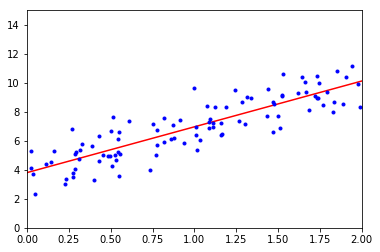

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.80564112]), array([[3.15981826]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.80564112],
       [10.12527764]])

In [12]:
eta = 0.1
n_iterations = 1000
m = 100

In [13]:
theta = np.random.randn(2, 1)

In [14]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.80564112],
       [3.15981826]])

In [16]:
np.random.randint(m)

69

In [17]:
n_epochs = 50
t0, t1 = 5, 50

In [18]:
def learning_schedule(t):
    return t0 / (t + t1)

In [19]:
theta = np.random.randn(2, 1)

In [20]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[3.80171558],
       [3.18018667]])

In [22]:
y.shape

(100, 1)

In [23]:
y.ravel().shape

(100,)

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [26]:
sgd_reg.fit(X, y.ravel())

c:\program files\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77534389]), array([3.11610271]))

In [28]:
m = 100 


In [29]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [32]:
X_poly = poly_features.fit_transform(X)

In [34]:
X[0]

array([-0.65757543])

In [35]:
X_poly[0]

array([-0.65757543,  0.43240544])

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lin_reg.intercept_, lin_reg.coef_

(array([2.09165237]), array([[1.02358924, 0.49790676]]))

In [64]:
X_new = np.linspace(-3, 3, 20).reshape(-1, 1)

In [65]:
X_new_poly = poly_features.fit_transform(X_new)

In [66]:
X_new_poly.shape

(20, 2)

In [67]:
y_predict = lin_reg.predict(X_new_poly)

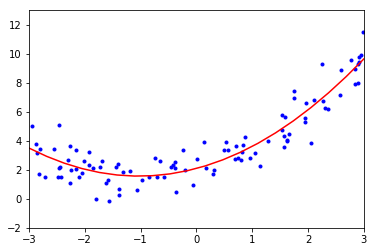

In [71]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.axis([-3, 3, -2, 13])
plt.show()

In [72]:
from sklearn.linear_model import Ridge

In [96]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [100]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [101]:
y_predict = ridge_reg.predict(X_new)

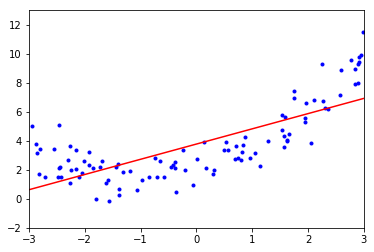

In [102]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.axis([-3, 3, -2, 13])
plt.show()

In [103]:
ridge_reg.predict([[1.5]])

array([[5.35093012]])

In [104]:
sgd_reg = SGDRegressor(penalty="l2")

In [105]:
sgd_reg.fit(X, y.ravel())

c:\program files\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [106]:
sgd_reg.predict([[1.5]])

array([4.38351758])

In [107]:
y_predict = sgd_reg.predict(X_new)

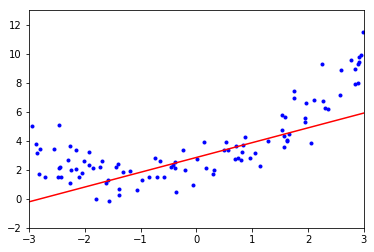

In [108]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.axis([-3, 3, -2, 13])
plt.show()

In [109]:
from sklearn.linear_model import Lasso

In [110]:
lasso_reg = Lasso(alpha=0.1)

In [111]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso_reg.predict([[1.5]])

array([5.31009633])

In [113]:
y_predict = lasso_reg.predict(X_new)

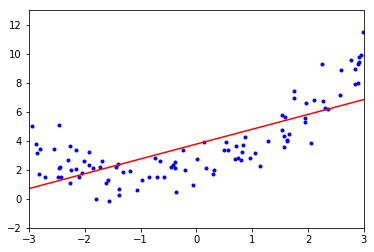

In [114]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.axis([-3, 3, -2, 13])
plt.show()

In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [117]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
elastic_net.predict([[1.5]])

array([5.30957086])

In [119]:
from sklearn.base import clone

In [ ]:
sgd_reg = SGDRegressor()